In [1]:
import os
import glob
import pandas as pd
import seaborn
import numpy as np
import nibabel as nb
import scipy
from datetime import datetime
import pickle


import sys
import sklearn
from sklearn.decomposition import NMF
from sklearn import preprocessing

%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\coco_\miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#plot stability and error gradient on same plot 
#right stri MULTIMODAL
#Corr

#Figure 3 - Stability plots
#plot stability and error gradient on same plot 
res_dir = '../stability_out/rightn10/' #MODIFY
df_right = pd.read_csv(res_dir + 'pnmf_cosine-sim_rightstri_corr.csv') #MODIFY

#extract the mean corr/stability value for each granularity
corr_right = [] # define list
for g in range(2,11):
    corr_right.append(df_right.loc[df_right['Granularity'] == g][['Corr_mean']].values)
#the syntax above df_right['Granularity'] == g][['Corr_mean']].values is saying, in df_right give me
#all rows where Granularity = g, then of those rows, give me Corr_mean column
#corr_right ends up being  a list of arrays, with those arrays being the Corr_mean for a given granularity

#get the mean and standard dev of the arrays in corr_right
#plt_arr ends up being a 1 X 9 array, each val is the mean Corr val across all splis for a granularity
plt_arr = np.zeros((1,np.shape(corr_right)[0]))
plt_std_arr = np.zeros((1,np.shape(corr_right)[0]))
for g in range(0,9):
    plt_arr[0,g] = np.mean(corr_right[g])
    plt_std_arr[0,g] = np.std(corr_right[g])
    
dict_errorgrad = {'Granularity' : np.arange(3,11).flatten()} #define a dictionary to store error gradient
#a very complicated way of doing: for each iteration/split (10 total splits), get an array of the recon errors
#so for split A_0, the array is the recon error at each granularity when using A_0 as input
#using np diff function - compute diff btwn each element (npdiff(100, 40, 20) = (-60, -20))
#this tells us the change in recon error from one granularity to the next - ie gradient of recon error
for iter in range(2,12):
    dict_errorgrad["A_iter" + str(iter)] = np.diff(df_right.loc[df_right['Iteration'] == iter][['Recon_errorA']].values.flatten(), axis=0).tolist()
    dict_errorgrad["B_iter" + str(iter)] = np.diff(df_right.loc[df_right['Iteration'] == iter][['Recon_errorB']].values.flatten(), axis=0).tolist()
    #print(dict_errorgrad)
    #print(np.arange(1,9))
    df_errorgrad = pd.DataFrame(data=dict_errorgrad, index = np.arange(1,9).flatten()) #make a dataframe, makes next steps easier

#similar to plt_arr above - define array to hold th mean grad recon error at each granularity
error_grad_arr = np.zeros((1,np.shape(np.arange(3,11))[0]))
error_grad_std_arr = np.zeros((1,np.shape(np.arange(3,11))[0]))
cols_list = []
for iter in range(1,10): #THIS ENSURES I GET THE right COLUMNS 
    cols_list.append("A_iter" + str(iter))
    cols_list.append("B_iter" + str(iter))
#print(df_errorgrad)
#for each granularity from 3 to 10, look in df_errorgrad to get the mean and stdev of the change in recon error
#error_grad_arr[0,0] ends up being the average change in recon error when moving from k=2tok=3
#error_grad_arr[0,1] ends up being the average change in recon error when moving from k=3tok=4 etc etc
for g in range(0,8):
    #print(df_errorgrad.loc[df_errorgrad['Granularity'] == g+3])
    error_grad_arr[0,g] = np.mean(df_errorgrad.loc[df_errorgrad['Granularity'] == g+3].values[0,:])
    error_grad_std_arr[0,g] = np.std(df_errorgrad.loc[df_errorgrad['Granularity'] == g+3].values[0,:])



In [4]:
#right stri UNIMODAL T1T2
#Corr

#Figure 3 - Stability plots
#plot stability and error gradient on same plot 
res_dir = '../Stability_multimodal_vs_unimodal/stability_out/right10/' #MODIFY
df_right_T1T2 = pd.read_csv(res_dir + 'pnmf_cosine-sim_rightstri_T1T2_corr.csv') #MODIFY

#extract the mean corr/stability value for each granularity
corr_right_T1T2 = [] # define list
for g in range(2,11):
    corr_right_T1T2.append(df_right_T1T2.loc[df_right_T1T2['Granularity'] == g][['Corr_mean']].values)
#the syntax above df_right['Granularity'] == g][['Corr_mean']].values is saying, in df_right give me
#all rows where Granularity = g, then of those rows, give me Corr_mean column
#corr_right ends up being  a list of arrays, with those arrays being the Corr_mean for a given granularity

#get the mean and standard dev of the arrays in corr_right
#plt_arr ends up being a 1 X 9 array, each val is the mean Corr val across all splis for a granularity
plt_arr_T1T2 = np.zeros((1,np.shape(corr_right_T1T2)[0]))
plt_std_arr_T1T2 = np.zeros((1,np.shape(corr_right_T1T2)[0]))
for g in range(0,9):
    plt_arr_T1T2[0,g] = np.mean(corr_right_T1T2[g])
    plt_std_arr_T1T2[0,g] = np.std(corr_right_T1T2[g])
    
dict_errorgrad_T1T2 = {'Granularity' : np.arange(3,11).flatten()} #define a dictionary to store error gradient
#a very complicated way of doing: for each iteration/split (10 total splits), get an array of the recon errors
#so for split A_0, the array is the recon error at each granularity when using A_0 as input
#using np diff function - compute diff btwn each element (npdiff(100, 40, 20) = (-60, -20))
#this tells us the change in recon error from one granularity to the next - ie gradient of recon error
for iter in range(2,12):
    dict_errorgrad_T1T2["A_iter" + str(iter)] = np.diff(df_right_T1T2.loc[df_right['Iteration'] == iter][['Recon_errorA']].values.flatten(), axis=0).tolist()
    dict_errorgrad_T1T2["B_iter" + str(iter)] = np.diff(df_right_T1T2.loc[df_right['Iteration'] == iter][['Recon_errorB']].values.flatten(), axis=0).tolist()
    #print(dict_errorgrad)
    #print(np.arange(1,9))
    df_errorgrad_T1T2 = pd.DataFrame(data=dict_errorgrad_T1T2, index = np.arange(1,9).flatten()) #make a dataframe, makes next steps easier

#similar to plt_arr above - define array to hold th mean grad recon error at each granularity
error_grad_arr_T1T2 = np.zeros((1,np.shape(np.arange(3,11))[0]))
error_grad_std_arr_T1T2 = np.zeros((1,np.shape(np.arange(3,11))[0]))
cols_list_T1T2 = []
for iter in range(1,10): #THIS ENSURES I GET THE right COLUMNS 
    cols_list_T1T2.append("A_iter" + str(iter))
    cols_list_T1T2.append("B_iter" + str(iter))
#print(df_errorgrad)
#for each granularity from 3 to 10, look in df_errorgrad to get the mean and stdev of the change in recon error
#error_grad_arr[0,0] ends up being the average change in recon error when moving from k=2tok=3
#error_grad_arr[0,1] ends up being the average change in recon error when moving from k=3tok=4 etc etc
for g in range(0,8):
    #print(df_errorgrad.loc[df_errorgrad['Granularity'] == g+3])
    error_grad_arr_T1T2[0,g] = np.mean(df_errorgrad_T1T2.loc[df_errorgrad_T1T2['Granularity'] == g+3].values[0,:])
    error_grad_std_arr_T1T2[0,g] = np.std(df_errorgrad_T1T2.loc[df_errorgrad_T1T2['Granularity'] == g+3].values[0,:])

In [5]:
#PLOT UNIMODAL FA

#Corr

#Figure 3 - Stability plots
#plot stability and error gradient on same plot 
res_dir = '../Stability_multimodal_vs_unimodal/stability_out/right10/' #MODIFY
df_right_FA = pd.read_csv(res_dir + 'pnmf_cosine-sim_rightstri_FA_corr.csv') #MODIFY

#extract the mean corr/stability value for each granularity
corr_right_FA= [] # define list
for g in range(2,11):
    corr_right_FA.append(df_right_FA.loc[df_right_FA['Granularity'] == g][['Corr_mean']].values)
#the syntax above df_right['Granularity'] == g][['Corr_mean']].values is saying, in df_right give me
#all rows where Granularity = g, then of those rows, give me Corr_mean column
#corr_right ends up being  a list of arrays, with those arrays being the Corr_mean for a given granularity

#get the mean and standard dev of the arrays in corr_right
#plt_arr ends up being a 1 X 9 array, each val is the mean Corr val across all splis for a granularity
plt_arr_FA = np.zeros((1,np.shape(corr_right_FA)[0]))
plt_std_arr_FA = np.zeros((1,np.shape(corr_right_FA)[0]))
for g in range(0,9):
    plt_arr_FA[0,g] = np.mean(corr_right_FA[g])
    plt_std_arr_FA[0,g] = np.std(corr_right_FA[g])
    
dict_errorgrad_FA = {'Granularity' : np.arange(3,11).flatten()} #define a dictionary to store error gradient
#a very complicated way of doing: for each iteration/split (10 total splits), get an array of the recon errors
#so for split A_0, the array is the recon error at each granularity when using A_0 as input
#using np diff function - compute diff btwn each element (npdiff(100, 40, 20) = (-60, -20))
#this tells us the change in recon error from one granularity to the next - ie gradient of recon error
for iter in range(2,12):
    dict_errorgrad_FA["A_iter" + str(iter)] = np.diff(df_right_FA.loc[df_right['Iteration'] == iter][['Recon_errorA']].values.flatten(), axis=0).tolist()
    dict_errorgrad_FA["B_iter" + str(iter)] = np.diff(df_right_FA.loc[df_right['Iteration'] == iter][['Recon_errorB']].values.flatten(), axis=0).tolist()
    #print(dict_errorgrad)
    #print(np.arange(1,9))
    df_errorgrad_FA = pd.DataFrame(data=dict_errorgrad_FA, index = np.arange(1,9).flatten()) #make a dataframe, makes next steps easier

#similar to plt_arr above - define array to hold th mean grad recon error at each granularity
error_grad_arr_FA = np.zeros((1,np.shape(np.arange(3,11))[0]))
error_grad_std_arr_FA = np.zeros((1,np.shape(np.arange(3,11))[0]))
cols_list_FA = []
for iter in range(1,10): #THIS ENSURES I GET THE right COLUMNS 
    cols_list_FA.append("A_iter" + str(iter))
    cols_list_FA.append("B_iter" + str(iter))
#print(df_errorgrad)
#for each granularity from 3 to 10, look in df_errorgrad to get the mean and stdev of the change in recon error
#error_grad_arr[0,0] ends up being the average change in recon error when moving from k=2tok=3
#error_grad_arr[0,1] ends up being the average change in recon error when moving from k=3tok=4 etc etc
for g in range(0,8):
    #print(df_errorgrad.loc[df_errorgrad['Granularity'] == g+3])
    error_grad_arr_FA[0,g] = np.mean(df_errorgrad_FA.loc[df_errorgrad_FA['Granularity'] == g+3].values[0,:])
    error_grad_std_arr_FA[0,g] = np.std(df_errorgrad_FA.loc[df_errorgrad_FA['Granularity'] == g+3].values[0,:])

In [6]:
#UNIMODAL MD

#Corr

#Figure 3 - Stability plots
#plot stability and error gradient on same plot 
res_dir = '../Stability_multimodal_vs_unimodal/stability_out/right10/' #MODIFY
df_right_MD = pd.read_csv(res_dir + 'pnmf_cosine-sim_rightstri_MD_corr.csv') #MODIFY

#extract the mean corr/stability value for each granularity
corr_right_MD= [] # define list
for g in range(2,11):
    corr_right_MD.append(df_right_MD.loc[df_right_MD['Granularity'] == g][['Corr_mean']].values)
#the syntax above df_right['Granularity'] == g][['Corr_mean']].values is saying, in df_right give me
#all rows where Granularity = g, then of those rows, give me Corr_mean column
#corr_right ends up being  a list of arrays, with those arrays being the Corr_mean for a given granularity

#get the mean and standard dev of the arrays in corr_right
#plt_arr ends up being a 1 X 9 array, each val is the mean Corr val across all splis for a granularity
plt_arr_MD = np.zeros((1,np.shape(corr_right_MD)[0]))
plt_std_arr_MD = np.zeros((1,np.shape(corr_right_MD)[0]))
for g in range(0,9):
    plt_arr_MD[0,g] = np.mean(corr_right_MD[g])
    plt_std_arr_MD[0,g] = np.std(corr_right_MD[g])
    
dict_errorgrad_MD = {'Granularity' : np.arange(3,11).flatten()} #define a dictionary to store error gradient
#a very complicated way of doing: for each iteration/split (10 total splits), get an array of the recon errors
#so for split A_0, the array is the recon error at each granularity when using A_0 as input
#using np diff function - compute diff btwn each element (npdiff(100, 40, 20) = (-60, -20))
#this tells us the change in recon error from one granularity to the next - ie gradient of recon error
for iter in range(2,12):
    dict_errorgrad_MD["A_iter" + str(iter)] = np.diff(df_right_MD.loc[df_right['Iteration'] == iter][['Recon_errorA']].values.flatten(), axis=0).tolist()
    dict_errorgrad_MD["B_iter" + str(iter)] = np.diff(df_right_MD.loc[df_right['Iteration'] == iter][['Recon_errorB']].values.flatten(), axis=0).tolist()
    #print(dict_errorgrad)
    #print(np.arange(1,9))
    df_errorgrad_MD = pd.DataFrame(data=dict_errorgrad_MD, index = np.arange(1,9).flatten()) #make a dataframe, makes next steps easier

#similar to plt_arr above - define array to hold th mean grad recon error at each granularity
error_grad_arr_MD = np.zeros((1,np.shape(np.arange(3,11))[0]))
error_grad_std_arr_MD = np.zeros((1,np.shape(np.arange(3,11))[0]))
cols_list_MD = []
for iter in range(1,10): #THIS ENSURES I GET THE right COLUMNS 
    cols_list_MD.append("A_iter" + str(iter))
    cols_list_MD.append("B_iter" + str(iter))
#print(df_errorgrad)
#for each granularity from 3 to 10, look in df_errorgrad to get the mean and stdev of the change in recon error
#error_grad_arr[0,0] ends up being the average change in recon error when moving from k=2tok=3
#error_grad_arr[0,1] ends up being the average change in recon error when moving from k=3tok=4 etc etc
for g in range(0,8):
    #print(df_errorgrad.loc[df_errorgrad['Granularity'] == g+3])
    error_grad_arr_MD[0,g] = np.mean(df_errorgrad_MD.loc[df_errorgrad_MD['Granularity'] == g+3].values[0,:])
    error_grad_std_arr_MD[0,g] = np.std(df_errorgrad_MD.loc[df_errorgrad_MD['Granularity'] == g+3].values[0,:])

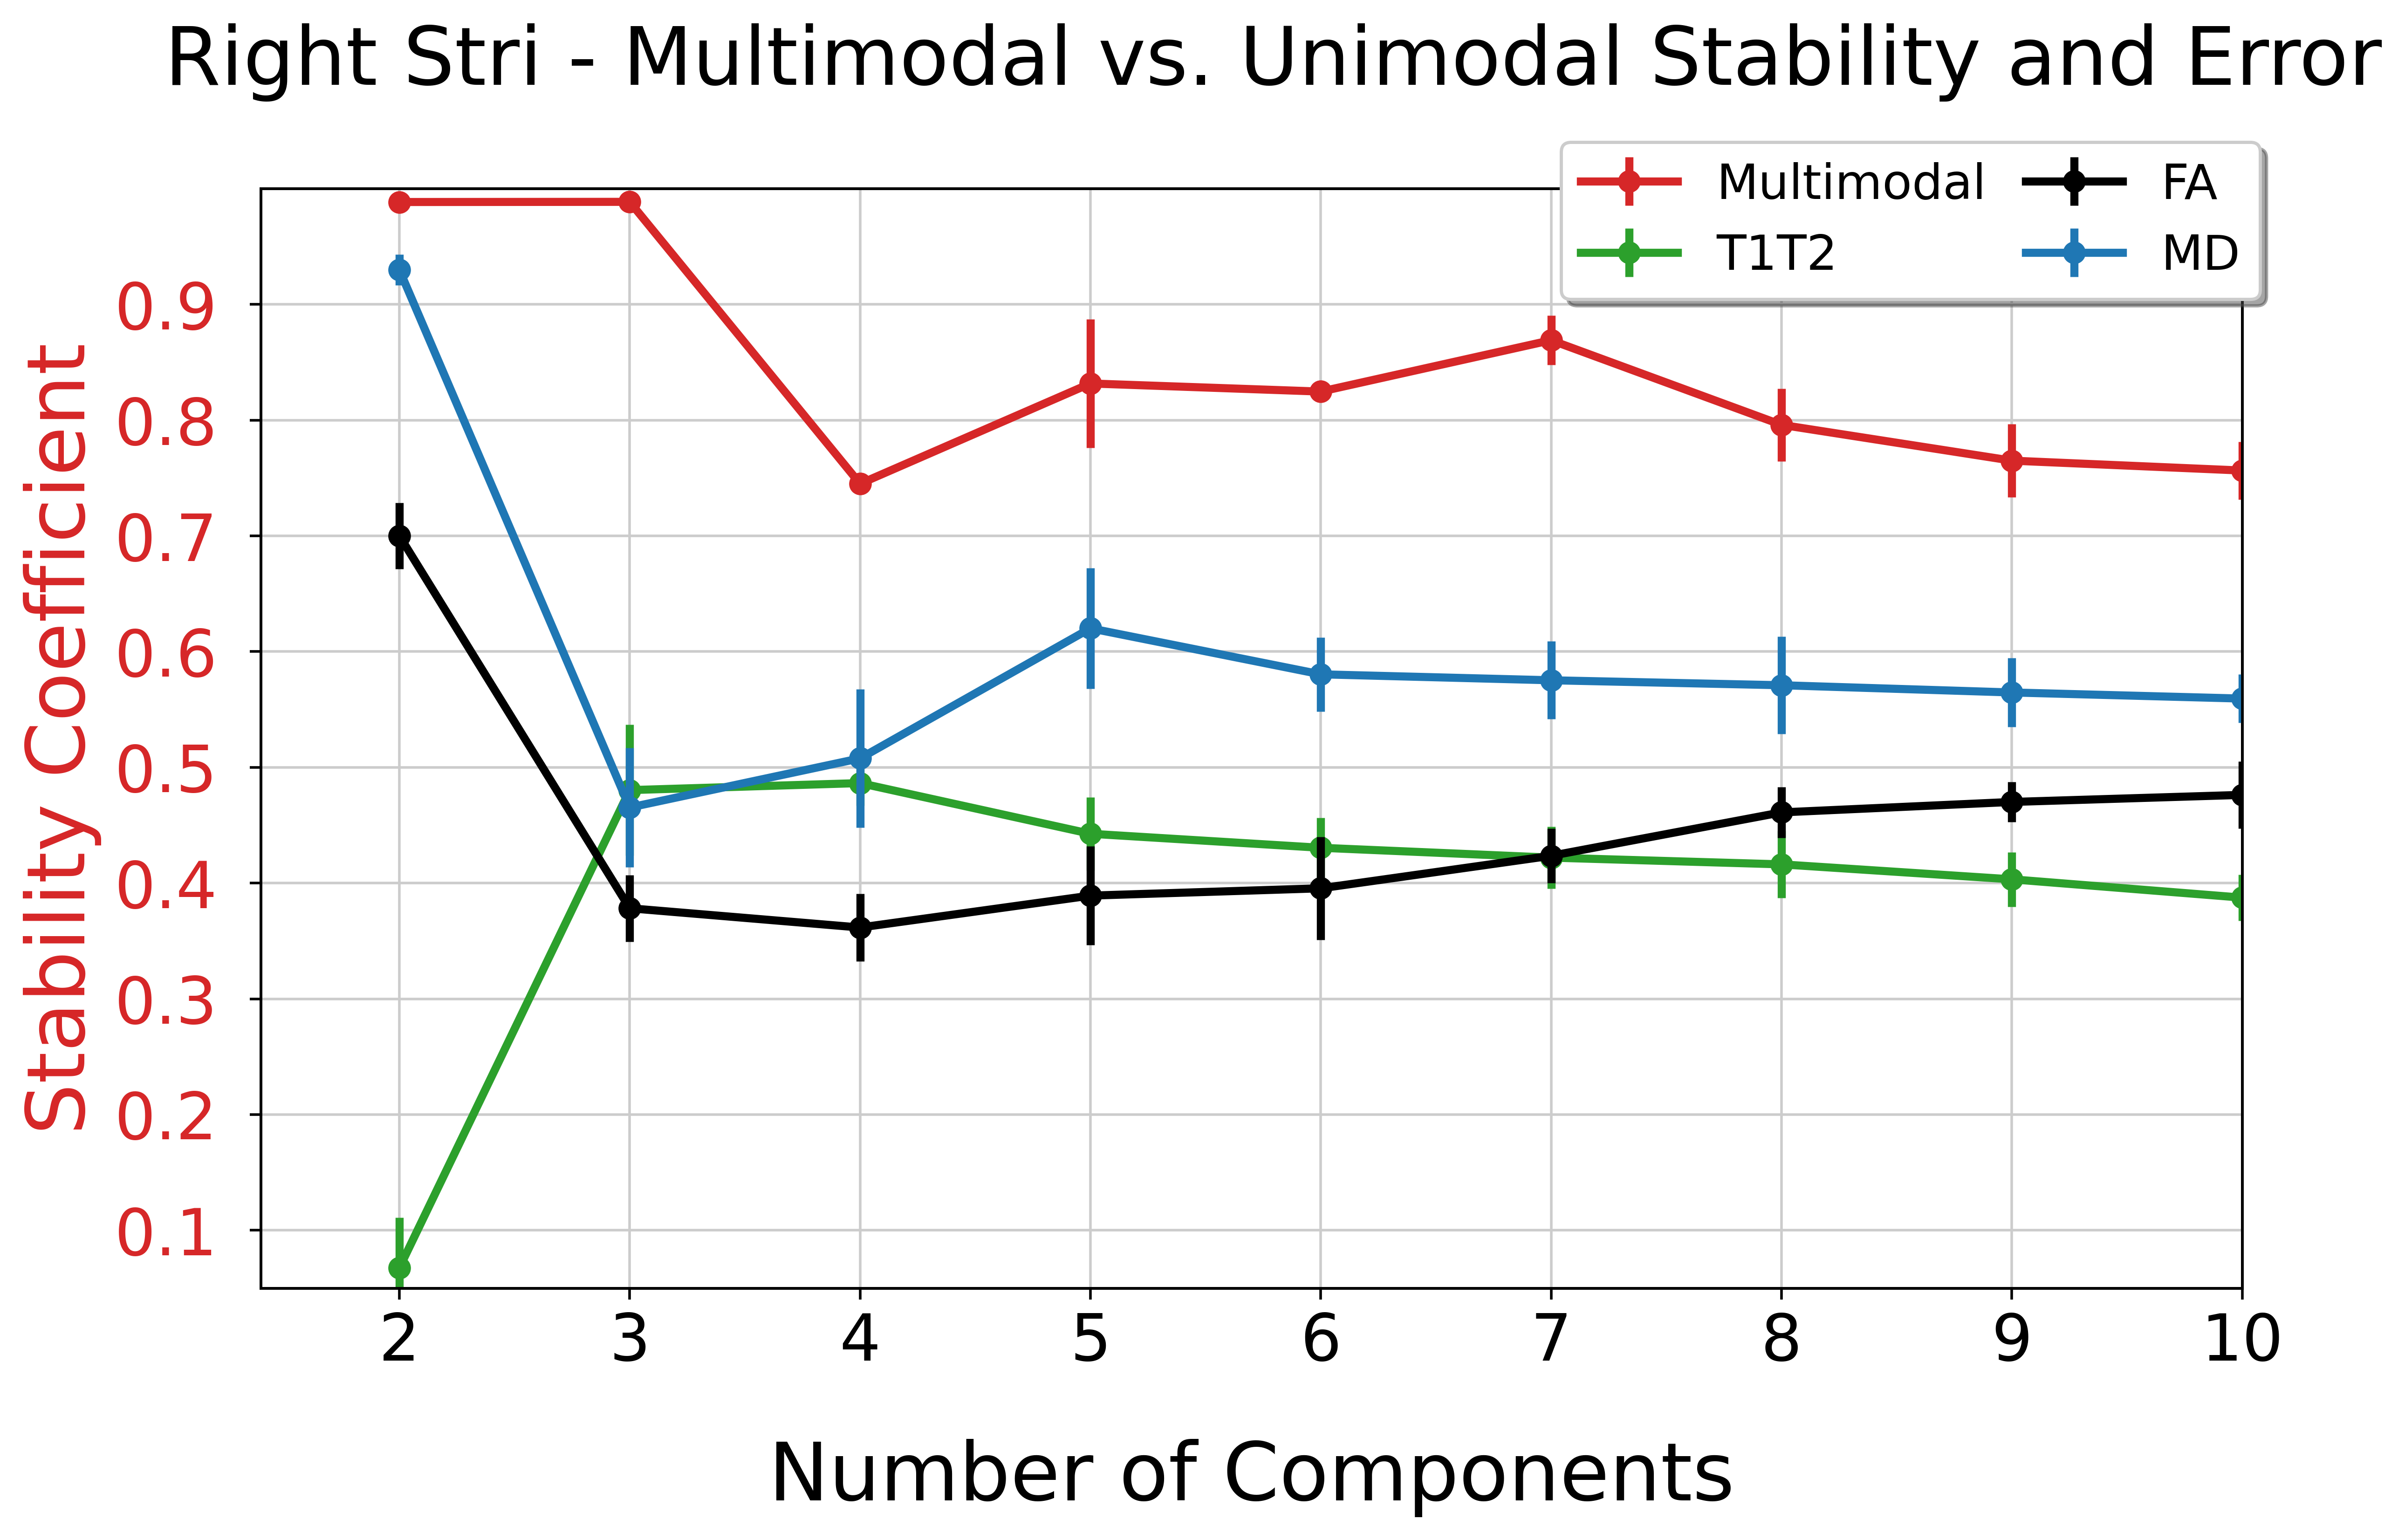

In [12]:
#PLOT MULTIMODAL
t = np.arange(2,11)
tt = np.arange(3,11)
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=500)
ax1.set_frame_on(False)
major_ticks = np.arange(0.1, 1, 0.1)
minor_ticks = np.arange(0.4, 1, 0.1)
ax1.set_yticks(major_ticks)
ax1.set_yticks(minor_ticks, minor=True)
ax1.grid(which='both', color='#CCCCCC')

color = 'tab:red'
ax1.set_xlabel('Number of Components', fontsize = 25, labelpad = 20)
ax1.set_ylabel('Stability Coefficient', color=color, fontsize = 25)
ax1.errorbar(t,plt_arr.flatten(),yerr=plt_std_arr.flatten(), c=color, marker=".", ms=12, lw = 2.5, label='Multimodal')

ax1.tick_params(axis='y', labelcolor=color, labelsize=20, pad = 10)
ax1.tick_params(axis='x', labelsize=20)
ax1.set_ylim(0.05,1)
ax1.set_xlim(1.4,10)
ax1.set_facecolor('white')
#ax1.annotate("Multimodal",(2.2, 0.90), color=color, fontsize = 15,fontweight = 2.5)

#PLOT UNIMODAL T1T2

ax3=ax1.twinx()
ax3.grid(which='both', color='#CCCCCC')

color = 'tab:green'
ax3.errorbar(t,plt_arr_T1T2.flatten(),yerr=plt_std_arr_T1T2.flatten(), c=color, marker=".", ms=12, lw = 2.5, label='T1T2')
ax3.set_ylim(0.05,1)
ax3.set_xlim(1.4,10)
ax3.set_facecolor('white')
ax3.get_yaxis().set_visible(False)
#ax3.annotate("T1T2",(1.4, 0.53), color=color, fontsize = 15,fontweight = 2.5)

#PlOT UNIMODAL FA
ax4=ax1.twinx()
ax4.grid(which='both', color='#CCCCCC')

color = 'black'
ax4.errorbar(t,plt_arr_FA.flatten(),yerr=plt_std_arr_FA.flatten(), c=color, marker=".", ms=12, lw = 2.5, label='FA')
ax4.set_ylim(0.05,1)
ax4.set_xlim(1.4,10)
ax4.set_facecolor('white')
ax4.get_yaxis().set_visible(False)
#ax4.annotate("FA",(1.6, 0.73), color=color, fontsize = 15,fontweight = 2.5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

#PlOT UNIMODAL MD
ax5=ax1.twinx()
ax5.grid(which='both', color='#CCCCCC')

color = 'tab:blue'
ax5.errorbar(t,plt_arr_MD.flatten(),yerr=plt_std_arr_MD.flatten(), c=color, marker=".", ms=12, lw = 2.5,label='MD')
ax5.set_ylim(0.05,1)
ax5.set_xlim(1.4,10)
ax5.set_facecolor('white')
ax5.get_yaxis().set_visible(False)
#ax5.annotate("MD",(1.6, 0.93), color=color, fontsize = 15,fontweight = 2.5)

#LEGEND
legend = fig.legend(bbox_to_anchor=(0.67, 0.9, 0.3, .10), loc='upper right',
           ncol=2, mode="expand", borderaxespad=0.,shadow=True, fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.text(0.98,1.09,'Right Stri - Multimodal vs. Unimodal Stability and Error', fontsize=25)
plt.savefig('rightstri_stability_unimodal.png', bbox_inches='tight', dpi = 'figure')
plt.show()

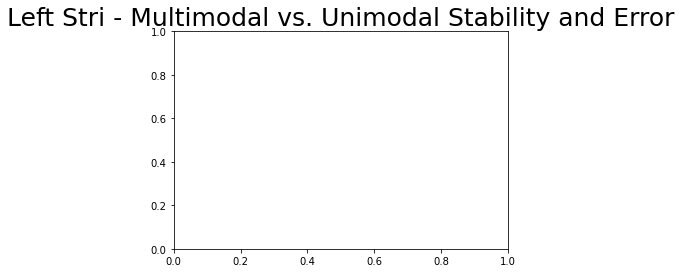

In [14]:

plt.title('right Stri - Multimodal vs. Unimodal Stability and Error', fontsize=25)
plt.savefig('rightstri_stability_unimodal.png', bbox_inches='tight', dpi = 'figure')
plt.show()